In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

model_improved = keras.models.load_model('plastics_model_v2.keras')
model_base = keras.models.load_model('plastics_model_v1.h5')

In [12]:
TRAIN_DIR = '/Users/michelangelozampieri/Desktop/plastics_CNN/seven_plastics'
TEST_DIR = '/Users/michelangelozampieri/Desktop/plastics_CNN/seven_plastics_test'
IMG_SIZE = (244, 244)
BATCH_SIZE = 32

In [13]:
# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Ensure labels are categorical
    shuffle=False  # Do not shuffle to maintain order for predictions
)

Found 294 images belonging to 8 classes.


In [14]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    '/Users/michelangelozampieri/Desktop/plastics_CNN/seven_plastics_test',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False  # Do not shuffle to maintain order for predictions
)

Found 294 files belonging to 8 classes.


In [15]:
# Generate predictions
predictions = model_improved.predict(test_generator)  # Use test_generator or test_dataset

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Map class indices to class names
class_indices = test_generator.class_indices  # Get class indices from the generator
class_names = {v: k for k, v in class_indices.items()}  # Reverse the mapping
predicted_labels = [class_names[idx] for idx in predicted_classes]

# Print predictions
print(predicted_labels)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 116s 13s/step
['7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_o

In [16]:
# Generate predictions
predictions_base = model_base.predict(test_generator)  # Use test_generator or test_dataset

# Convert predictions to class labels
predicted_classes_base = np.argmax(predictions, axis=1)

# Map class indices to class names
class_indices_base = test_generator.class_indices  # Get class indices from the generator
class_names_base = {v: k for k, v in class_indices.items()}  # Reverse the mapping
predicted_labels_base = [class_names[idx] for idx in predicted_classes]

# Print predictions
print(predicted_labels_base)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step
['7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_other_resins', '7_o

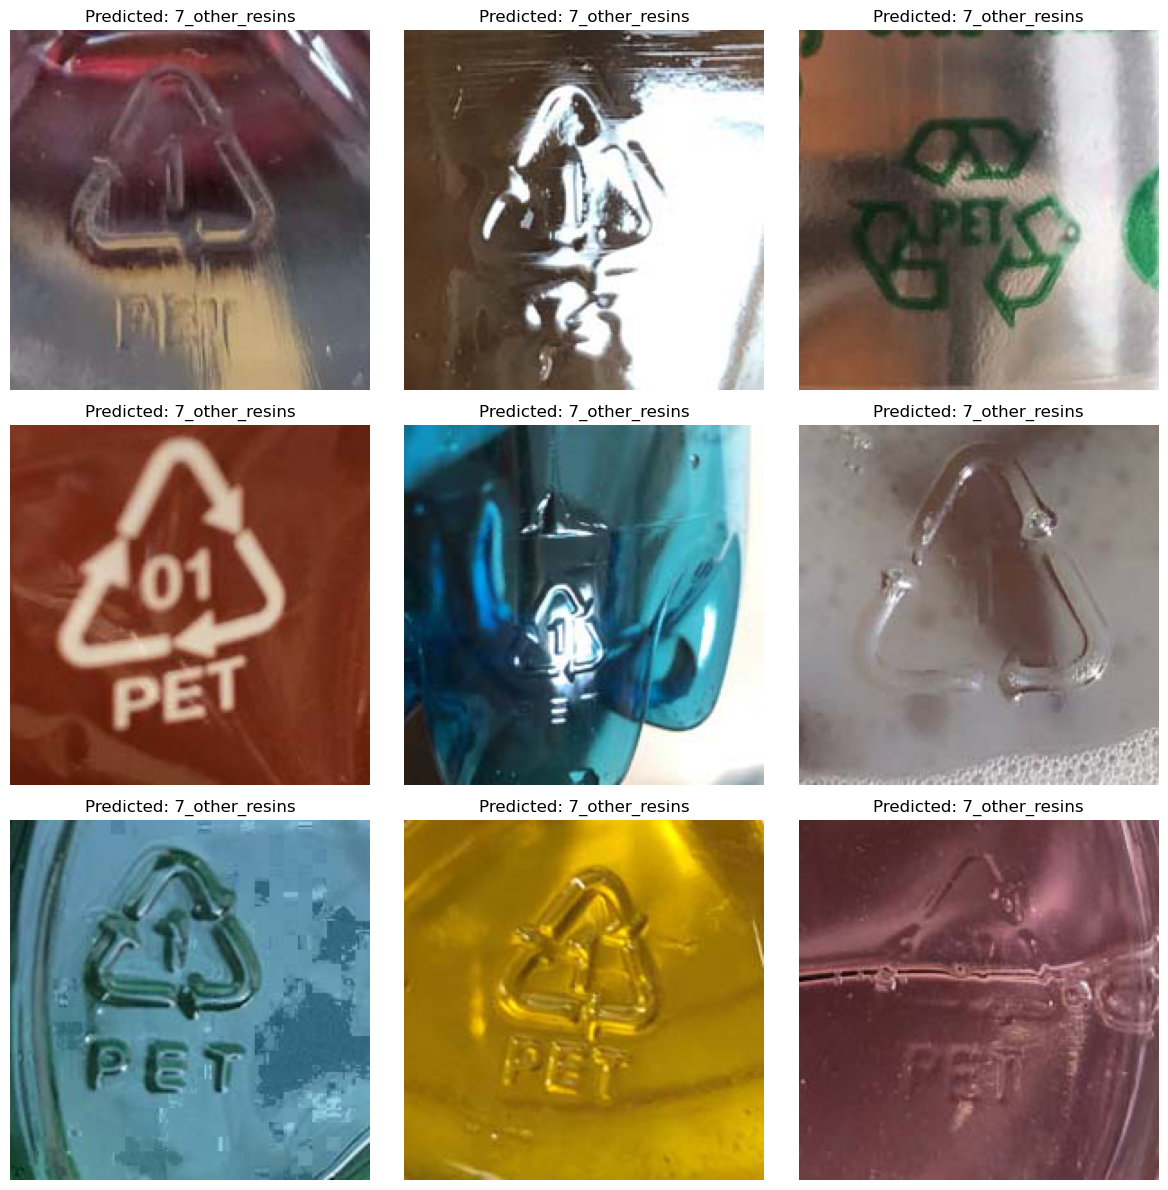

In [9]:
# Get the file paths of the test images
file_paths = test_generator.filepaths

# Plot a few test images with their predicted labels
plt.figure(figsize=(12, 12))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    img = plt.imread(file_paths[i])
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_base.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.0337 - loss: 2.1369
Test Loss: 2.0966033935546875
Test Accuracy: 0.09183673560619354


In [18]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_improved.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - accuracy: 0.0337 - loss: 2.1894
Test Loss: 2.101027727127075
Test Accuracy: 0.09183673560619354
